In [1]:
import os
import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import spacy
from spacy import displacy
from top2vec import Top2Vec
from wordcloud import WordCloud, STOPWORDS

from config import Config
from preprocessing.sentiment_analysis import get_sentiment

In [2]:
corpus = []
risk_file_names = glob.glob(os.path.join(Config.risk_dir(), '10k20f_5', '*.txt'))
for risk_file_name in tqdm(risk_file_names):
    with open(risk_file_name, 'r', encoding='utf-8') as risk_file:
        #import pdb; pdb.set_trace()
        docu = risk_file.read()
        if len(word_tokenize(docu)) > 100:
            corpus.append(docu)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3096/3096 [04:33<00:00, 11.31it/s]


In [3]:
print(f'Out of {len(risk_file_names)}, {len(corpus)} had valid text.')

Out of 3096, 1953 had valid text.


## The below Top2Vec model has been trained on 1953 files, ie a very small portion of the actual corpus. The result of topic modelling on this small corpus is that documents have been clustered into different industries. This leades me to believe that if group documents by industry this model can learn the domain specific language of that industry and return a list of topic.
## Top2Vec has various benefits over traditional topic modelling techniques.

In [4]:
model = Top2Vec.load('top2vec_model_deep')

In [5]:
print(f'Number of topics: {model.get_num_topics()}')

Number of topics: 31


In [6]:
model.get_topics()

(array([['frontier', 'councils', 'quad', ..., 'unions', 'aviation',
         'multiemployer'],
        ['unitholders', 'partnership', 'contentsindex', ...,
         'compression', 'mined', 'methane'],
        ['solutions', 'saas', 'software', ..., 'attention', 'memberships',
         'customers'],
        ...,
        ['aircraft', 'airline', 'lessees', ..., 'jet', 'shipping',
         'reorganizations'],
        ['loan', 'loans', 'noninterest', ..., 'inadequately', 'governors',
         'mortgage'],
        ['hotels', 'hotel', 'lodging', ..., 'franchising', 'improvements',
         'underinsured']], dtype='<U15'),
 array([[0.35758835, 0.35078293, 0.34462705, ..., 0.25954553, 0.25869513,
         0.2583104 ],
        [0.6173268 , 0.5460856 , 0.5297511 , ..., 0.3210952 , 0.3185597 ,
         0.3178021 ],
        [0.6808616 , 0.5496794 , 0.54155946, ..., 0.2784946 , 0.27594453,
         0.27460632],
        ...,
        [0.7766695 , 0.680389  , 0.6693871 , ..., 0.28494453, 0.28412613,
   

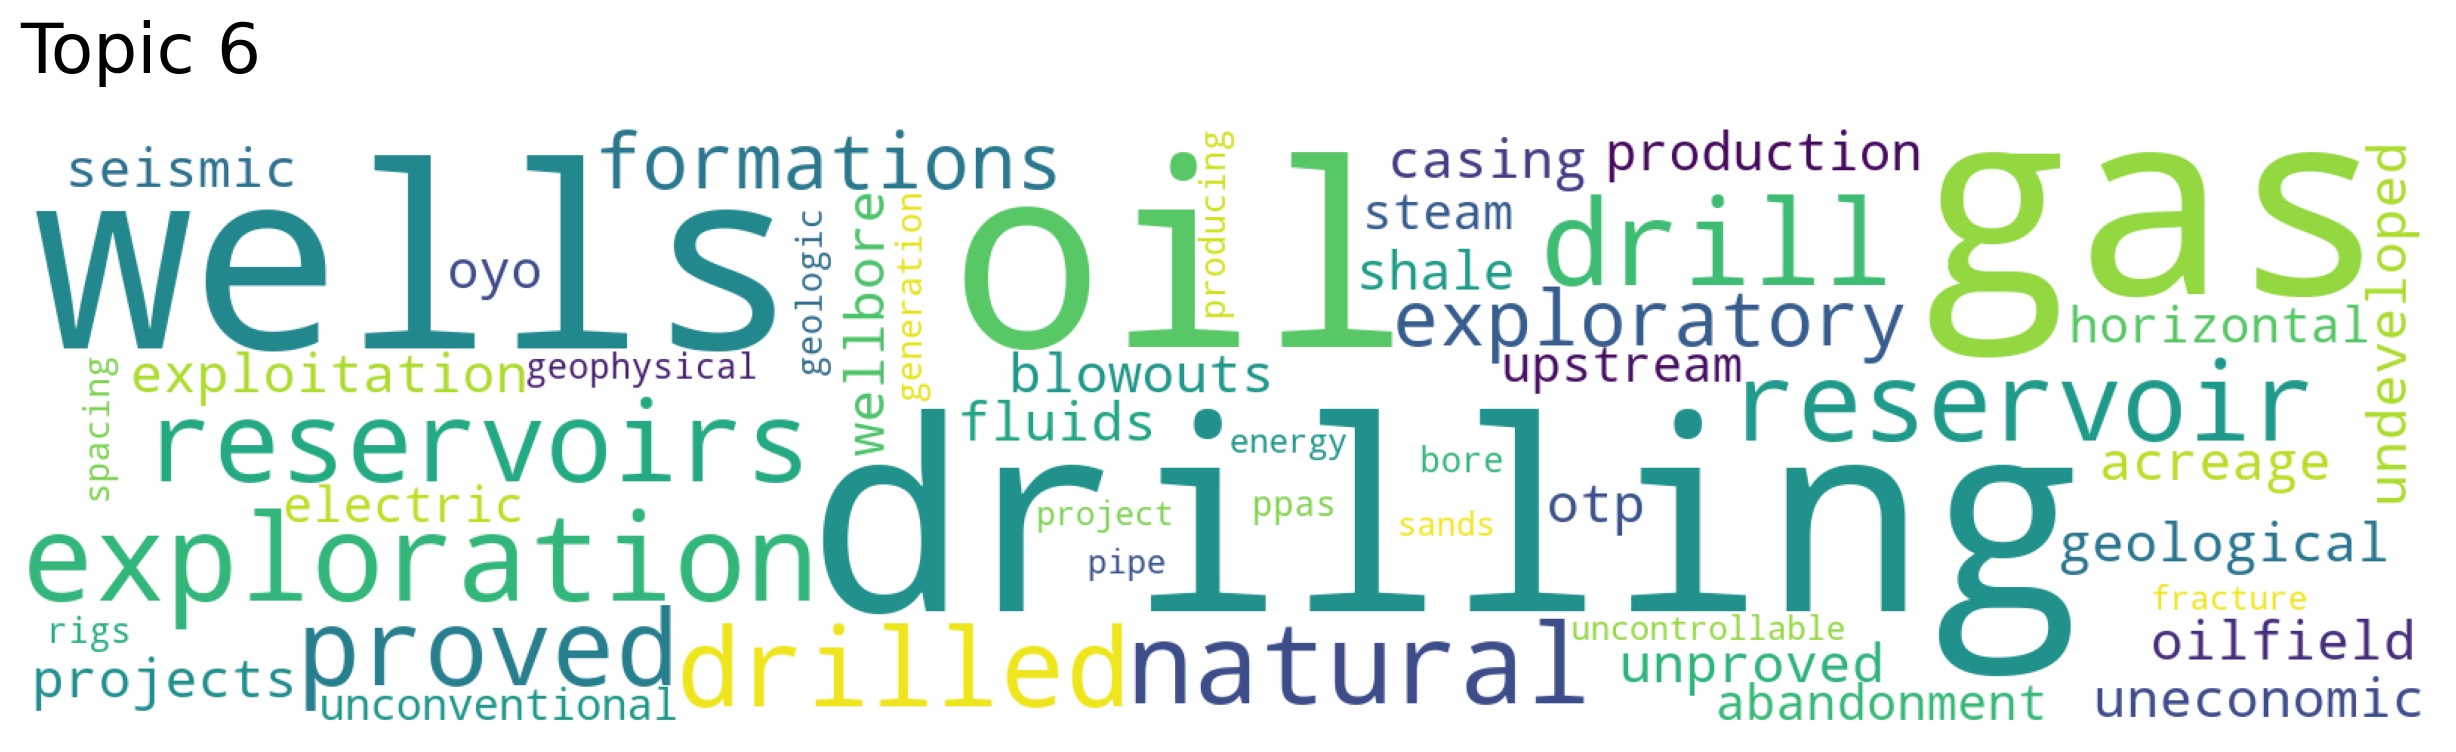

In [7]:
model.generate_topic_wordcloud(topic_num=6, background_color='white')

In [8]:
model.search_documents_by_topic(topic_num=6, num_docs=1)

(array(['The nature of our business activities subjects us to certain hazards and risks. The following is a summary of some of the material risks relating to our business activities. Other risks are described in “Item 1. Business” and “Item 7A. Quantitative and Qualitative Disclosures About Market Risk.” These risks are not the only risks we face. We could also face additional risks and uncertainties not currently known to the Company or that we currently deem to be immaterial. If any of these risks actually occurs, it could materially harm our business, financial conditional or results of operations and the trading price of our shares could decline.Risks Related to the Oil and Natural Gas Industry and Our BusinessA significant portion of our net leasehold acreage is undeveloped, and that acreage may not ultimately be developed or become commercially productive, which could cause us to lose rights under our leases as well as have a material adverse effect on our oil and natural gas res

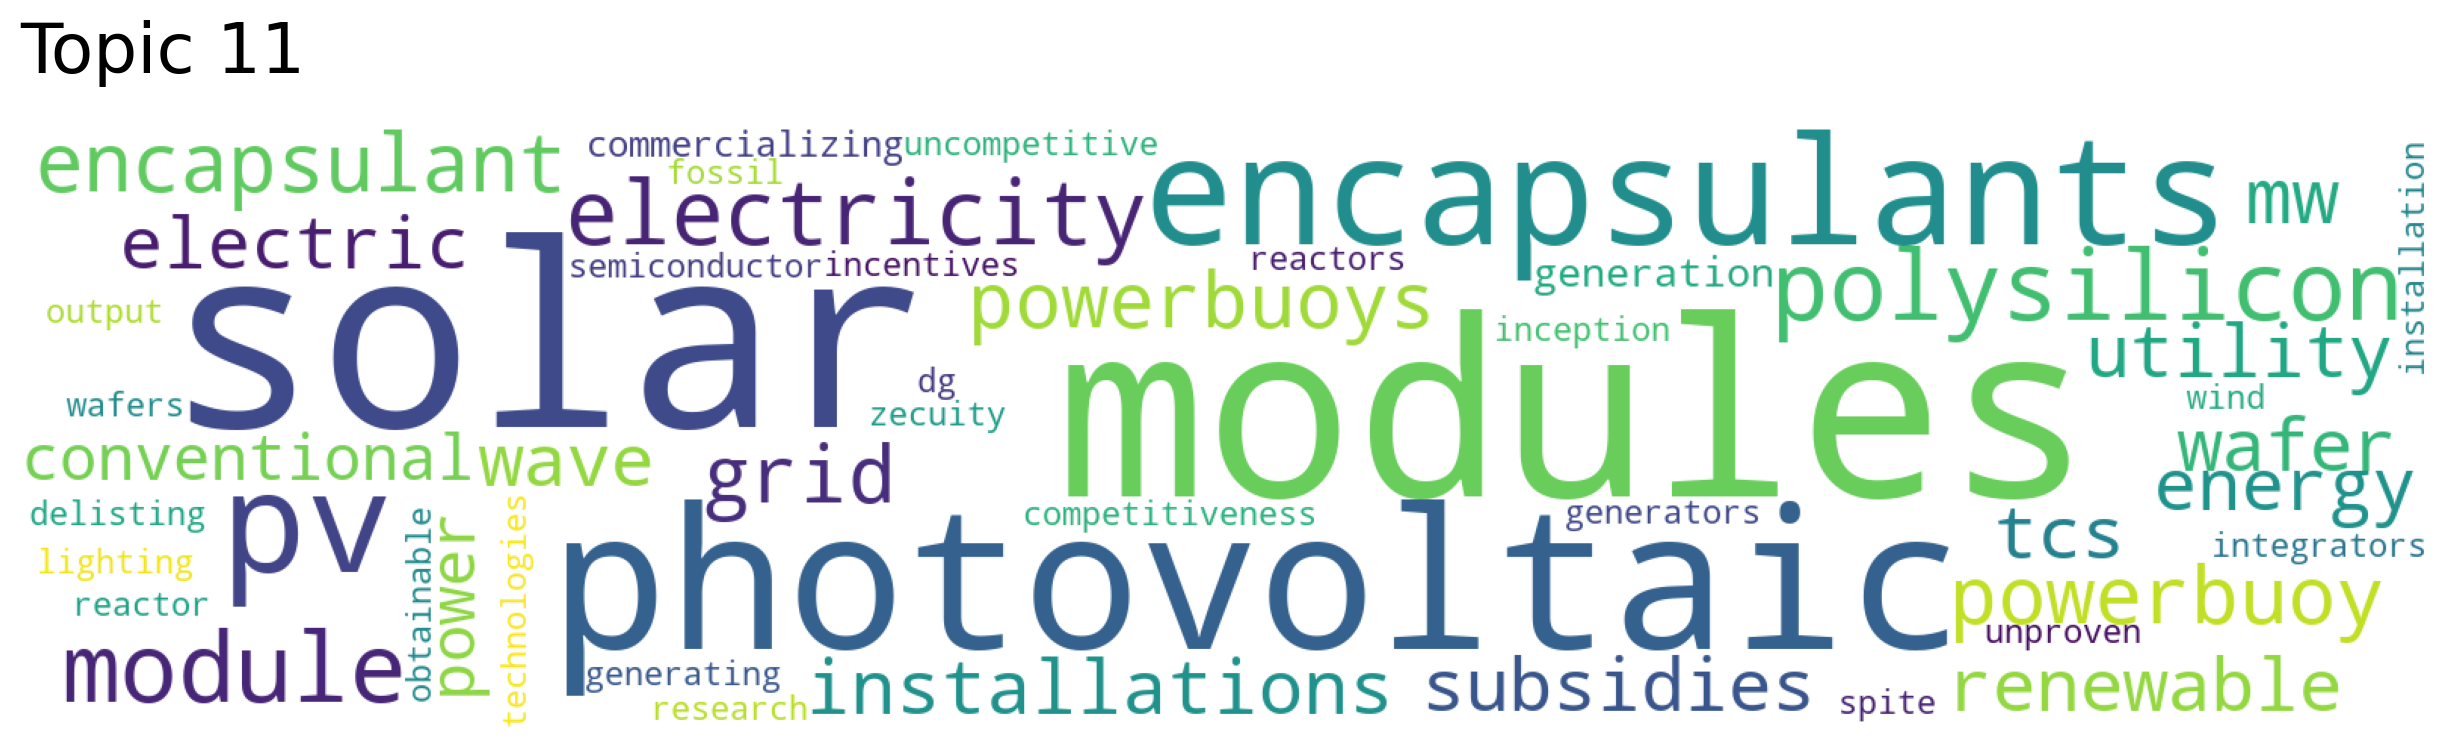

In [9]:
model.generate_topic_wordcloud(topic_num=11, background_color='white')

In [10]:
model.search_documents_by_topic(11, 1)

(array(["Risk FactorsThere are numerous and varied risks, known and unknown, that may prevent us from achieving our goals. If any of these risks actually occur, our business, prospects, financial condition or results of operation may be materially adversely affected. In such case, the trading price of our common stock could decline and investors could lose all or part of their investment.Risks Related to our BusinessWe have a limited operating history upon which an evaluation of our prospects can be made. We may never achieve profitability.Our operating subsidiary, Magnolia Solar, wasorganized on January 8, 2008, and has had only limited operations since our inception upon which to evaluate our business prospects. As a result, investors do not have access to the same type of information in assessing their proposed investment as would be available to purchasers in a company with a history of prior operations. Although the technology for solar cells we are commercializing has been develo

In [12]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=['debt', 'oil', 'gas', 'drill'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f'Document: {doc_id}, Score: {score}')
    print('-----------')
    print(doc[:150])
    print('-----------')
    print()

Document: 100, Score: 0.6672
-----------
You should carefully consider the following risks and all of the information contained in this Report. Our
business, financial condition, and results 
-----------

Document: 435, Score: 0.612
-----------
The nature of our business activities subjects us to certain hazards and risks. The following is a summary of some of the material risks relating to o
-----------

Document: 154, Score: 0.6056
-----------
The nature of our business activities subjects us to certain hazards and risks. The following is a summary of some of the material risks relating to o
-----------

Document: 841, Score: 0.6043
-----------
Our business involves a high degree of risk. If any of the following risks, or any risk described elsewhere in
this Annual Report on Form 10-K in our 
-----------

Document: 1878, Score: 0.5902
-----------
The nature of our business activities subjects us to certain hazards and risks. The following is a summary of some of the material risks re

In [13]:
model.search_topics(keywords=['debt', 'solar'], num_topics=2)

([array(['solar', 'modules', 'photovoltaic', 'encapsulants', 'pv',
         'polysilicon', 'module', 'electricity', 'encapsulant', 'powerbuoy',
         'grid', 'powerbuoys', 'mw', 'installations', 'wafer', 'tcs',
         'subsidies', 'renewable', 'wave', 'utility', 'energy', 'electric',
         'conventional', 'power', 'generation', 'commercializing',
         'competitiveness', 'uncompetitive', 'incentives', 'wind',
         'lighting', 'output', 'wafers', 'dg', 'integrators',
         'semiconductor', 'research', 'reactors', 'unproven',
         'technologies', 'delisting', 'fossil', 'installation',
         'generating', 'inception', 'generators', 'reactor', 'spite',
         'zecuity', 'obtainable'], dtype='<U15'),
  array(['bdc', 'portfolio', 'adviser', 'investments', 'bdcs', 'ric', 'mc',
         'stellus', 'gc', 'investment', 'rics', 'invest', 'asset', 'mcc',
         'objective', 'investing', 'whitehorse', 'debt', 'exemptive', 'gsv',
         'securities', 'value', 'companie

In [14]:
model.similar_words(keywords=['debt'], num_words=10)

(array(['indebtedness', 'financing', 'covenants', 'refinance', 'revolving',
        'credit', 'flow', 'secured', 'principal', 'default'], dtype='<U12'),
 array([0.7907, 0.6704, 0.651 , 0.641 , 0.638 , 0.6323, 0.6152, 0.6127,
        0.6101, 0.5997]))

In [16]:
topics, probs, topic_nums = model.get_topics()

# Questions:
* What are you looking to get out of the model? Should these risks be represented by words or would you prefer to get an example of where it occurs in a document as evidence?
* Will it be possible to get a list mapping **companies**/**SIDs** to industries?
* Get a list of existing risks to identify emerging risks? Zygi used such a list. Is it *classified*/*grouped* over *years (or any such time period)* or by *industry*?